In [1]:
import numpy as np
import pandas as pd
import os
import string
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib


In [2]:
dataset = pd.read_csv("hawar.csv")
df = dataset

In [3]:
dataset.head(30)

,Unnamed: 0,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,22.054546,22.981421,8.888131,47.243720,49.063646,24.502298,5.726834,0.999074,0.873605,2.425557
1,1,13.787384,15.800654,6.862665,45.718242,51.148615,24.788157,12.847652,0.992264,0.931442,1.487597
2,2,10.569113,11.826785,5.232758,33.903509,37.089119,20.147563,11.364387,0.997223,0.932194,1.563355
3,3,10.307080,11.262095,3.771884,32.329709,34.551591,19.558942,20.671343,0.995996,0.906157,1.770618
4,4,11.133449,12.748891,3.379552,30.618554,33.724155,19.984905,14.406319,0.998210,0.883719,2.142671
5,5,24.708682,26.154560,8.863602,53.023354,55.309834,36.356802,2.101471,0.999697,0.910406,2.767981
6,6,44.611241,46.359729,18.585848,62.486275,64.375322,30.634416,3.234050,0.999610,0.870821,3.799876
7,7,35.501717,36.378779,18.614903,63.099917,64.285438,35.954528,3.245172,0.999397,0.890708,2.994748
8,8,28.078808,30.372410,4.019880,51.973624,55.488367,22.006036,2.673422,0.999659,0.911645,2.813379
9,9,16.749798,17.490814,4.545202,42.448292,43.849883,19.779645,3.339461,0.999372,0.948934,1.723987


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
import os

maindir = r'D:\skripsi\archive'
ds_path = os.path.join(maindir, "hawar")

if not os.path.exists(ds_path):
    os.makedirs(ds_path)

img_files = os.listdir(ds_path)

In [6]:
img_files[1]

'blas_1.png'

In [7]:
data_indices = np.arange(1, 361)  # Indeks data dari 1 hingga 360

# Fungsi untuk menentukan kelas berdasarkan indeks
def determine_class(index):
    if 1 <= index <= 120:
        return 1
    elif 121 <= index <= 240:
        return 2
    elif 241 <= index <= 360:
        return 3
    else:
        raise ValueError("Index out of range")
    
    classes = np.array([determine_class(idx) for idx in data_indices])

In [8]:
target_list = []

for file in img_files:
    try:
        target_num = int(file.split("_")[1].split(".")[0])  # extract image number from file name
    except IndexError:
        target_num = 0  # set default value if file name is not in expected format
    
    # Tentukan kelas berdasarkan rentang
    if 1 <= target_num <= 120:
        target = 1  # Kelas 1
    elif 121 <= target_num <= 240:
        target = 2  # Kelas 2
    elif 241 <= target_num <= 360:
        target = 3  # Kelas 3
    else:
        target = 0  # Default class atau handle kasus di luar rentang yang diharapkan
    
    target_list.append(target)


In [9]:
# create a mapping dictionary for label names
mapping = {'blas': 0, 'hawar': 1, 'sehat': 2}
# create a reverse mapping dictionary for label names
mapping_reverse = {v: k for k, v in mapping.items()}

In [10]:
y = np.array(target_list)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [11]:

X = dataset.iloc[:,1:]

In [12]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,22.054546,22.981421,8.888131,47.243720,49.063646,24.502298,5.726834,0.999074,0.873605,2.425557
1,13.787384,15.800654,6.862665,45.718242,51.148615,24.788157,12.847652,0.992264,0.931442,1.487597
2,10.569113,11.826785,5.232758,33.903509,37.089119,20.147563,11.364387,0.997223,0.932194,1.563355
3,10.307080,11.262095,3.771884,32.329709,34.551591,19.558942,20.671343,0.995996,0.906157,1.770618
4,11.133449,12.748891,3.379552,30.618554,33.724155,19.984905,14.406319,0.998210,0.883719,2.142671


In [13]:
y[0:5]

array([1, 1, 1, 1, 1])

In [14]:
#Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)
#menampilkan jumlah data training
print(f"data training: {X_train.shape[0]}")

#menampilkan jumlah data testing
print(f"data testing: {X_test.shape[0]}")

data training: 252
data testing: 108


In [17]:
X_train.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
334,10.174557,15.599052,3.369237,25.104159,33.700261,18.474291,8.556301,0.999305,0.884262,2.561788
244,14.853805,21.976993,14.135789,43.779988,64.126811,42.000237,3.191139,0.997194,0.942268,1.447596
42,5.941958,8.773299,1.876208,23.684235,30.507649,15.756558,10.749033,0.997816,0.946918,1.332135
0,22.054546,22.981421,8.888131,47.243720,49.063646,24.502298,5.726834,0.999074,0.873605,2.425557
227,5.249504,5.224376,2.789417,24.702691,23.721002,18.858978,11.717362,0.997348,0.951836,1.122625


In [18]:
X_train.shape

(252, 10)

In [19]:
y_train[0:5]

array([3, 3, 1, 1, 2])

In [20]:
#Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
X_train[0:2]

array([[-0.25558328, -0.0493782 , -0.49494508, -0.5485099 , -0.27513868,
        -0.50945091, -0.48120639,  0.79542579, -0.38060609,  0.46475804],
       [ 0.04261114,  0.34878641,  1.01493912,  0.66158793,  1.66998091,
         2.10998081, -0.88810665,  0.10647238,  0.44967746, -0.40599736]])

In [24]:
y_train[0:2]

array([3, 3])

In [25]:
#Applying SVM classifier model

In [26]:
from sklearn import svm

In [27]:
clf = svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_train,y_train)

SVC(C=100.0, gamma=0.01)

In [28]:
joblib.dump(clf, "svm_model.pkl")
joblib.dump(sc_X, "scaler.pkl")

['scaler.pkl']

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn import metrics

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.8796296296296297

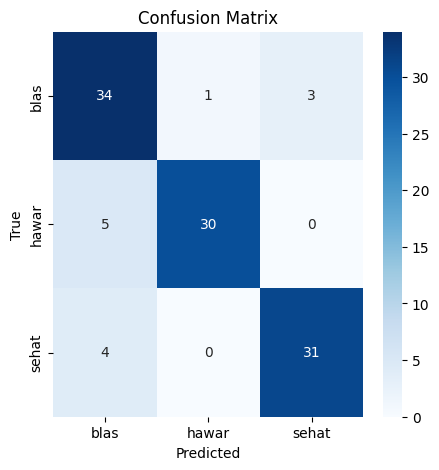

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(mapping.keys()), yticklabels=list(mapping.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.89      0.84        38
           2       0.97      0.86      0.91        35
           3       0.91      0.89      0.90        35

    accuracy                           0.88       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.89      0.88      0.88       108



In [34]:
from sklearn.model_selection import GridSearchCV


In [35]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [36]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [37]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
int(clf.predict(X_train[0:1])[0])

3

In [39]:
clf = svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_train,y_train)

SVC(C=100.0, gamma=0.1)

In [40]:
y_pred_svm = clf.predict(X_test)

In [41]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.433 (+/-0.074) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.437 (+/-0.061) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.441 (+/-0.117) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.797 (+/-0.109) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.845 (+/-0.113) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.873 (+/-0.091) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.437 (+/-0.061) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.437 (+/-0.093) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.793 (+/-0.156) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.869 (+/-0.109) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.861 (+/-0.056) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.861 (+/-0.072) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.441 (+/-0.101) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.793 (+/-0.103) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.881 (+/-0.113) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.881 (+/-0.051) for {'C': 100, 'gamma': 0.1, 'kernel':

In [42]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8888888888888888

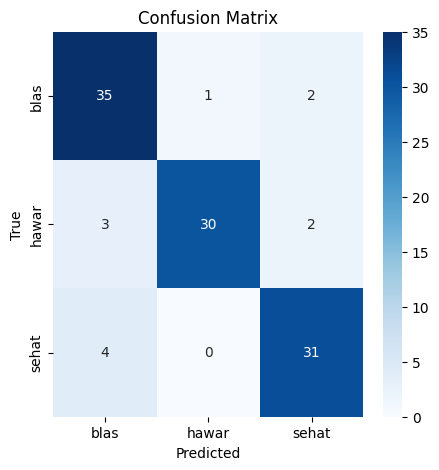

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(mapping.keys()), yticklabels=list(mapping.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.83      0.92      0.88        38
           2       0.97      0.86      0.91        35
           3       0.89      0.89      0.89        35

    accuracy                           0.89       108
   macro avg       0.90      0.89      0.89       108
weighted avg       0.89      0.89      0.89       108



Accuracy: 0.8425925925925926
Log Loss: 0.3745910464911785


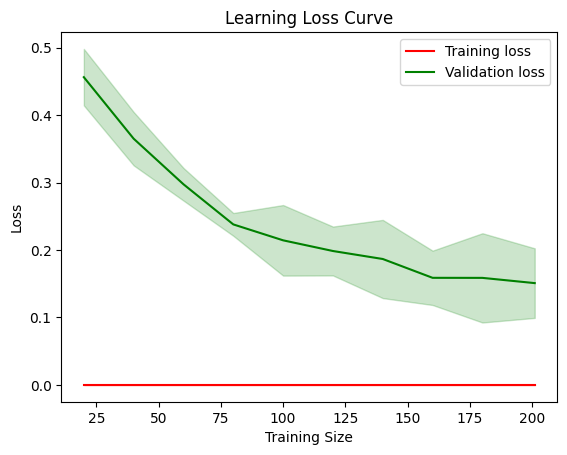

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, log_loss
data = load_iris()
X = np.random.rand(360, 10)  # 10 fitur
y = np.array([0]*120 + [1]*120 + [2]*120)
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Menghitung akurasi dan log loss
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Log Loss: {loss}')
# Menggunakan learning_curve untuk mendapatkan nilai train_sizes, train_scores, dan val_scores
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Menghitung rata-rata dan standar deviasi dari skor pelatihan dan validasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Menghitung loss (loss = 1 - score)
train_loss_mean = 1 - train_scores_mean
train_loss_std = train_scores_std
val_loss_mean = 1 - val_scores_mean
val_loss_std = val_scores_std

# Membuat plot learning loss
plt.figure()
plt.plot(train_sizes, train_loss_mean, label='Training loss', color='r')
plt.fill_between(train_sizes, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, color='r', alpha=0.2)
plt.plot(train_sizes, val_loss_mean, label='Validation loss', color='g')
plt.fill_between(train_sizes, val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, color='g', alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.title('Learning Loss Curve')
plt.legend()
plt.show()

In [46]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from sklearn.preprocessing import StandardScaler

def extract_features_from_image(img):
    # Preprocessing
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25, 25), 0)
    ret_otsu, im_bw_otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((50, 50), np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    # Color features
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0
    
    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)
    
    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
    
    # Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]
    
    vector = [red_mean, green_mean, blue_mean, red_std, green_std, blue_std,
              contrast, correlation, inverse_diff_moments, entropy]

    return vector

def predict_single_image(img):
    # Ekstraksi fitur dari gambar
    features = extract_features_from_image(img)
    
    # Konversi fitur ke DataFrame
    df = pd.DataFrame([features], columns=['mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b',
                                           'contrast', 'correlation', 'inverse_diff_moments', 'entropy'])
    
    return df

def predict_new_image(img, scaler, model):
    # Ekstraksi fitur dari gambar
    features = extract_features_from_image(img)
    
    # Skala fitur menggunakan scaler yang sama dengan data latih
    features_scaled = scaler.transform([features])
    
    # Prediksi menggunakan model SVM
    prediction = model.predict(features_scaled)
    
    # Interpretasi hasil prediksi dan mengembalikan label kelas
    if prediction == 1:
        return "Kelas 1 (blas)"
    elif prediction == 2:
        return "Kelas 2 (hawar)"
    else:
        return "Kelas 3 (sehat)"

# Contoh penggunaan:
img_path = 'D:\\skripsi\\archive\\hawar\\hawar_150.png'
img = cv2.imread(img_path)

if img is None:
    print("Unable to read image:", img_path)
else:
    # Assume scaler and model are pre-loaded or defined elsewhere in the code
    predicted_label = predict_new_image(img, sc_X, model)
    print("Prediksi untuk gambar baru:", predicted_label)


Prediksi untuk gambar baru: Kelas 2 (hawar)


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
